In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy

In [ ]:
df=pd.read_csv('/content/Customer-Churn-Records.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
 df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
print("\nData types:\n", df.dtypes)


Data types:
 CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (10000, 15)


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


<Axes: title={'center': 'five number summary of Balance'}>

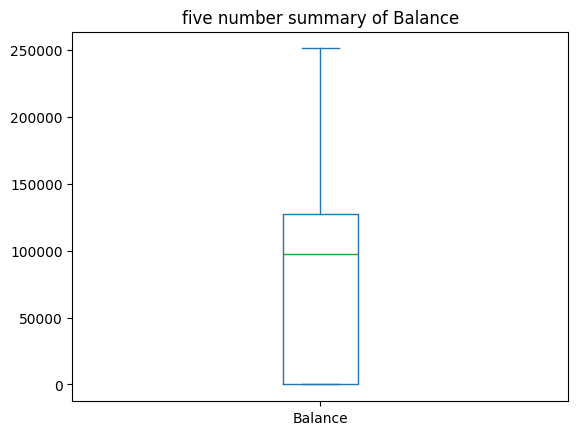

In [ ]:
df['Balance'].plot(kind='box',title='five number summary of Balance')

/tmp/ipython-input-12-793472352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


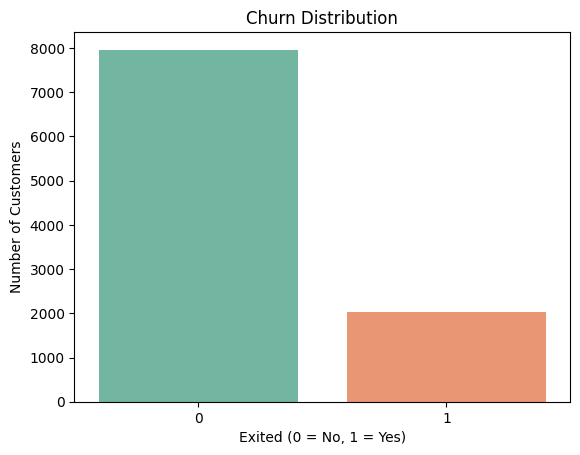

In [ ]:
# Countplot for churn
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate.round(2))

Churn Rate:
 Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


/tmp/ipython-input-15-312734447.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set3')


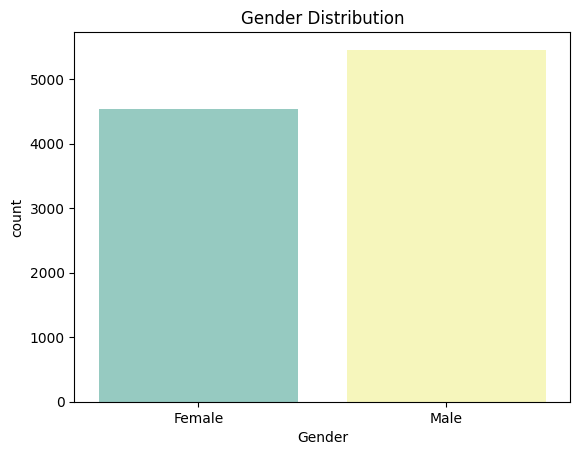

In [ ]:
sns.countplot(x='Gender', data=df, palette='Set3')
plt.title("Gender Distribution")
plt.show()

/tmp/ipython-input-16-2875371823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=df, palette='cool')


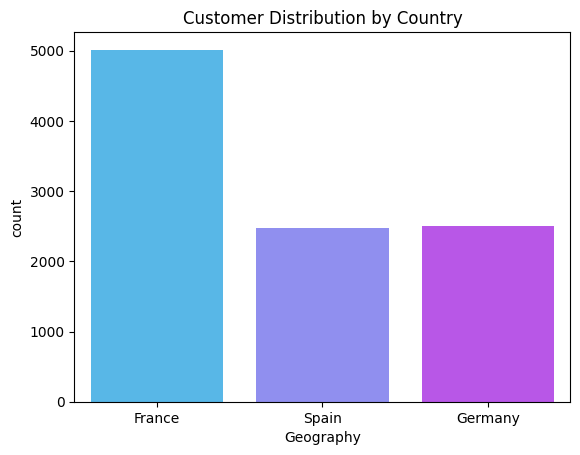

In [ ]:
sns.countplot(x='Geography', data=df, palette='cool')
plt.title("Customer Distribution by Country")
plt.show()

/tmp/ipython-input-17-3007171493.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Card Type', data=df, palette='magma')


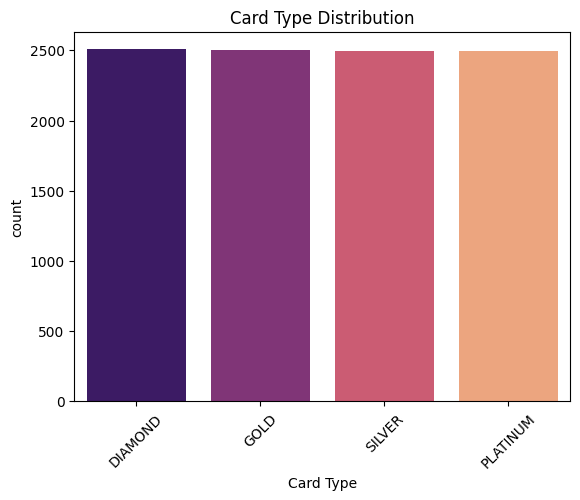

In [ ]:
sns.countplot(x='Card Type', data=df, palette='magma')
plt.title("Card Type Distribution")
plt.xticks(rotation=45)
plt.show()

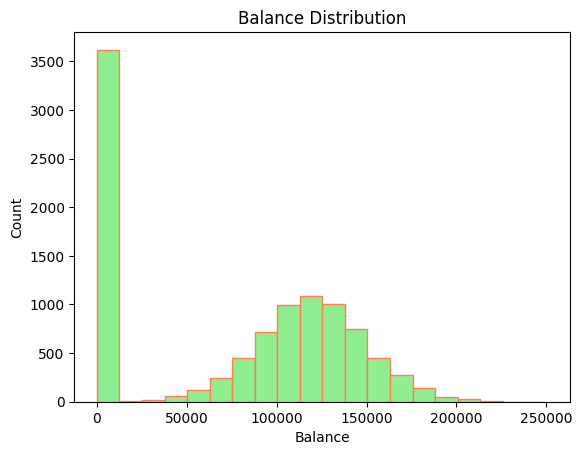

In [ ]:
plt.hist(df['Balance'], bins=20, color='lightgreen',edgecolor='coral')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

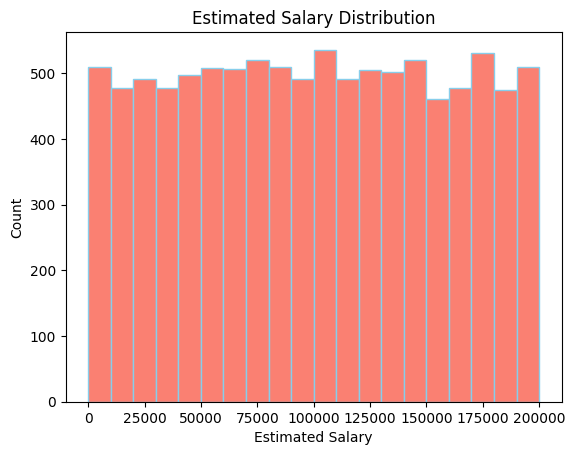

In [ ]:
plt.hist(df['EstimatedSalary'], bins=20, color='salmon', edgecolor='skyblue')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.show()

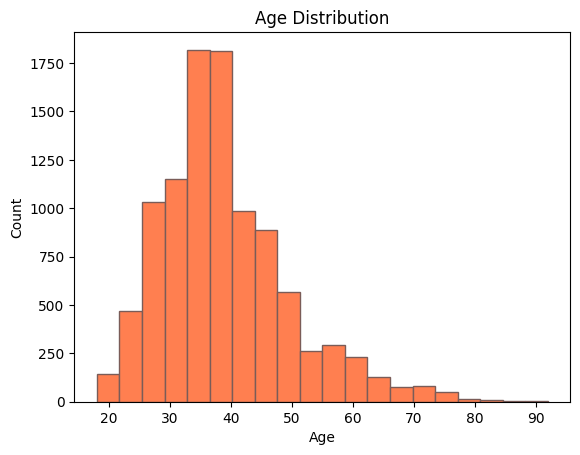

In [ ]:
plt.hist(df['Age'], bins=20, color='coral',edgecolor='#7A5C58')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
df['AgeGroup']=df['Age'].apply(lambda x: 'Teen' if x<20 else 'Young Adult' if x<30 else 'Adult' if x<40 else 'Middle Aged' if x<50 else 'Old')

In [ ]:
fig = px.box(df, x='AgeGroup', y='EstimatedSalary', title='Estimated Salary Distribution by AgeGroup')
fig.show()

In [ ]:
findings=[]
findings.append('Middle Aged and Young Adults earn the most closely followed by Adult and Old')
findings.append('French people live longer on average compared to other EU countries in dataset')
findings.append('German people have a greater median salary.')

<Axes: xlabel='AgeGroup', ylabel='EstimatedSalary'>

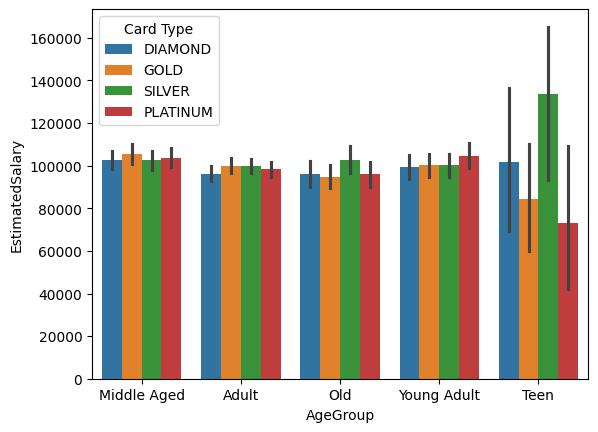

In [ ]:
sns.barplot(x=df['AgeGroup'],y=df['EstimatedSalary'],hue=df['Card Type'])

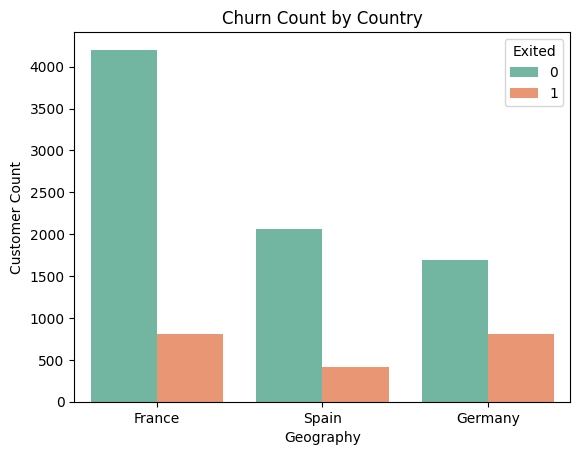

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=df, palette='Set2')
plt.title("Churn Count by Country")
plt.ylabel("Customer Count")
plt.show()

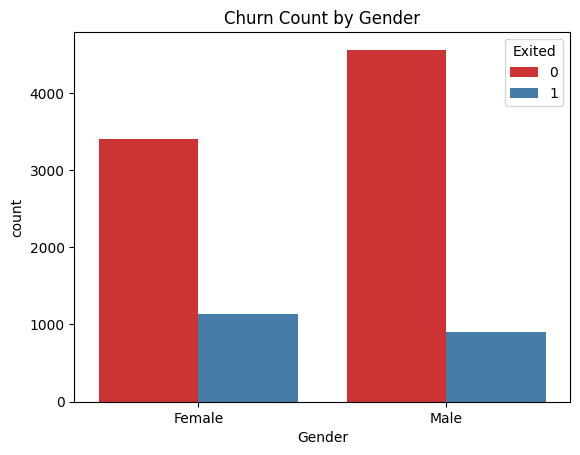

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=df, palette='Set1')
plt.title("Churn Count by Gender")
plt.show()

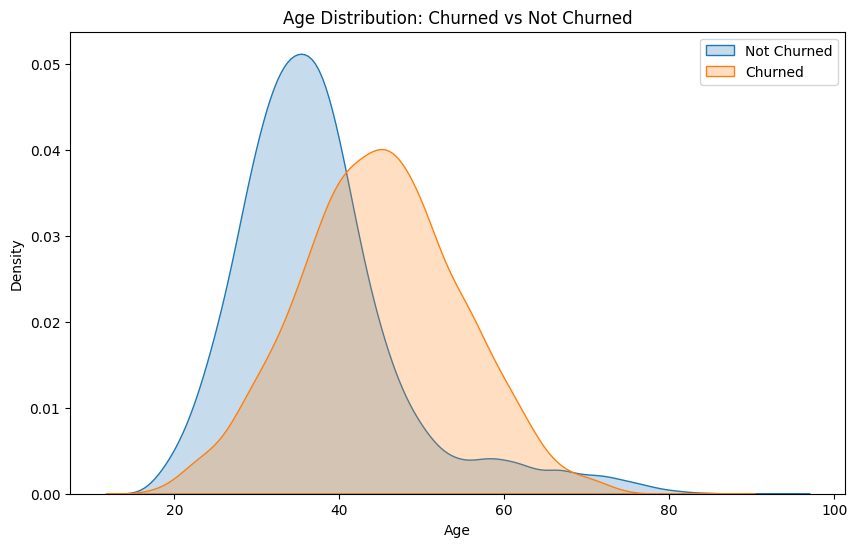

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Exited'] == 0]['Age'], label='Not Churned', fill=True)
sns.kdeplot(data=df[df['Exited'] == 1]['Age'], label='Churned', fill=True)
plt.title("Age Distribution: Churned vs Not Churned")
plt.legend()
plt.show()

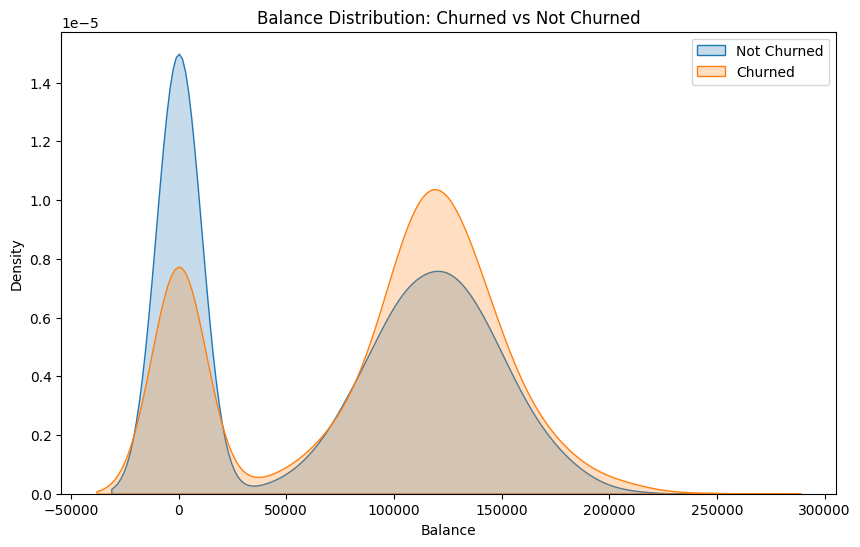

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Exited'] == 0]['Balance'], label='Not Churned', fill=True)
sns.kdeplot(data=df[df['Exited'] == 1]['Balance'], label='Churned', fill=True)
plt.title("Balance Distribution: Churned vs Not Churned")
plt.legend()
plt.show()

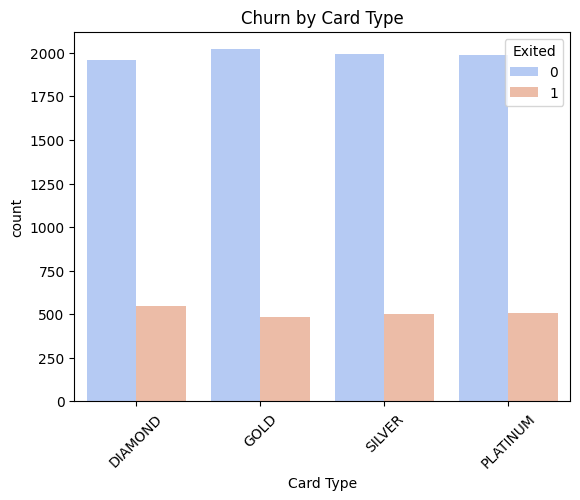

In [ ]:
sns.countplot(data=df, x='Card Type', hue='Exited', palette='coolwarm')
plt.title("Churn by Card Type")
plt.xticks(rotation=45)
plt.show()

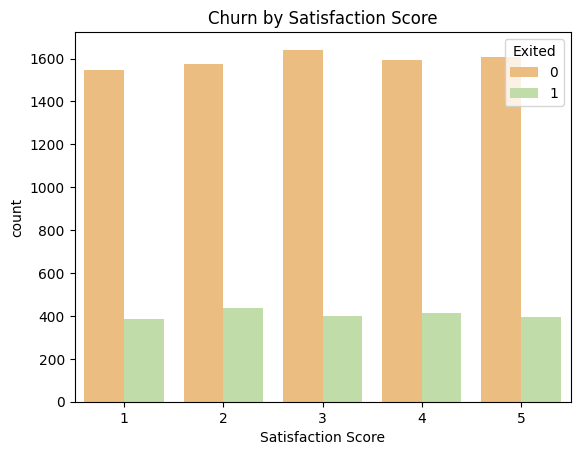

In [ ]:
sns.countplot(data=df, x='Satisfaction Score', hue='Exited', palette='Spectral')
plt.title("Churn by Satisfaction Score")
plt.show()

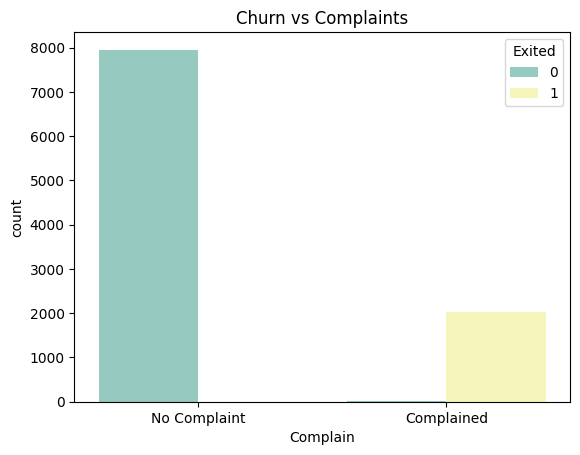

In [ ]:
sns.countplot(x='Complain', hue='Exited', data=df, palette='Set3')
plt.title("Churn vs Complaints")
plt.xticks([0, 1], ['No Complaint', 'Complained'])
plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)

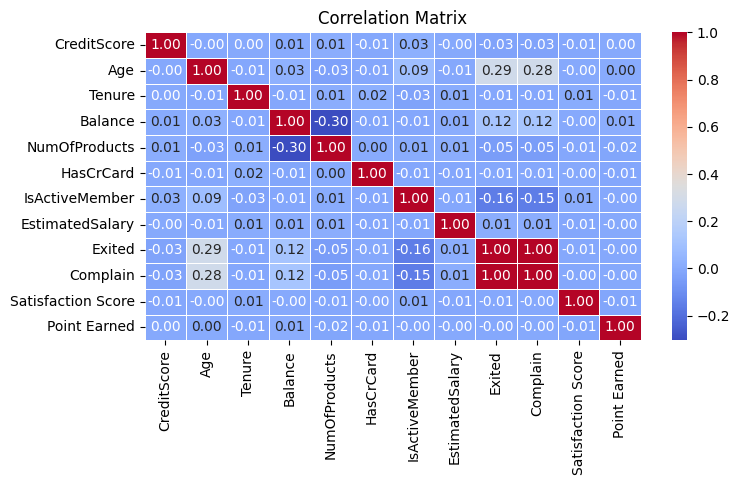

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

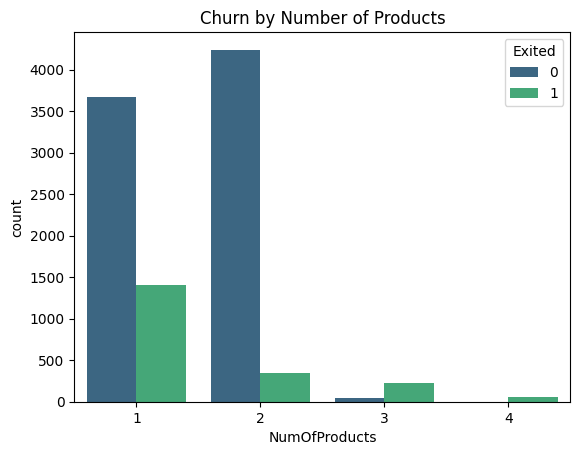

In [ ]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='viridis')
plt.title("Churn by Number of Products")
plt.show()

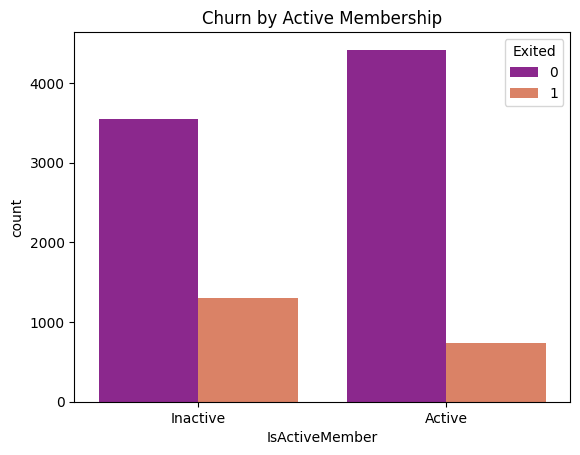

In [ ]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='plasma')
plt.title("Churn by Active Membership")
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()

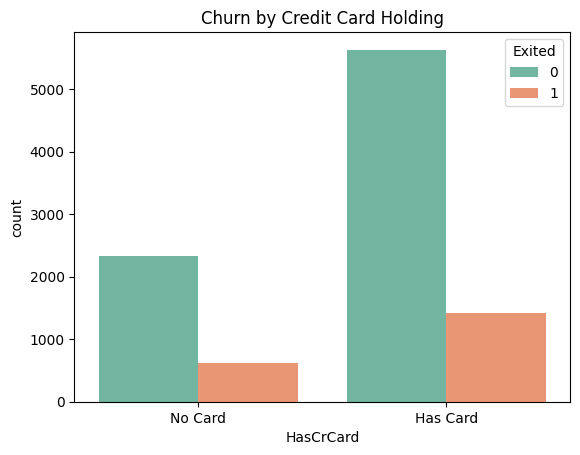

In [ ]:
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='Set2')
plt.title("Churn by Credit Card Holding")
plt.xticks([0, 1], ['No Card', 'Has Card'])
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
geo_churn = pd.crosstab(df['Geography'], df['Exited'])

In [ ]:
# chi-square testing
chi2, p, dof, expected = chi2_contingency(geo_churn)

print("Chi2 Statistic:", chi2)
print("p-value:", p)

Chi2 Statistic: 300.6264011211942
p-value: 5.245736109572763e-66


In [ ]:
from scipy.stats import mannwhitneyu

churned = df[df['Exited'] == 1]['Balance']
retained = df[df['Exited'] == 0]['Balance']

u_stat, p_val = mannwhitneyu(churned, retained)

print("Mann-Whitney U Statistic:", u_stat)
print("p-value:", p_val)

Mann-Whitney U Statistic: 9373909.5
p-value: 1.1687654686289807e-28


In [ ]:
from scipy.stats import kruskal

groups = [df[df['Satisfaction Score'] == score]['Exited'] for score in df['Satisfaction Score'].unique()]
stat, p = kruskal(*groups)

print("Kruskal-Wallis Statistic:", stat)
print("p-value:", p)

Kruskal-Wallis Statistic: 3.8023232622810688
p-value: 0.4334189737963099


In [ ]:
country_churn_rate = df.groupby('Geography')['Exited'].mean().round(3) * 100
print("Churn Rate by Country (%):\n", country_churn_rate)

Churn Rate by Country (%):
 Geography
France     16.2
Germany    32.4
Spain      16.7
Name: Exited, dtype: float64


In [ ]:
df_spain = df[df['Geography'] == 'Spain']
df_france = df[df['Geography'] == 'France']
df_germany = df[df['Geography'] == 'Germany']

In [ ]:
def churn_rate(df_country, country_name):
    rate = df_country['Exited'].mean() * 100
    print(f"{country_name} Churn Rate: {rate:.2f}%")

churn_rate(df_spain, "Spain")
churn_rate(df_france, "France")
churn_rate(df_germany, "Germany")

Spain Churn Rate: 16.67%
France Churn Rate: 16.17%
Germany Churn Rate: 32.44%


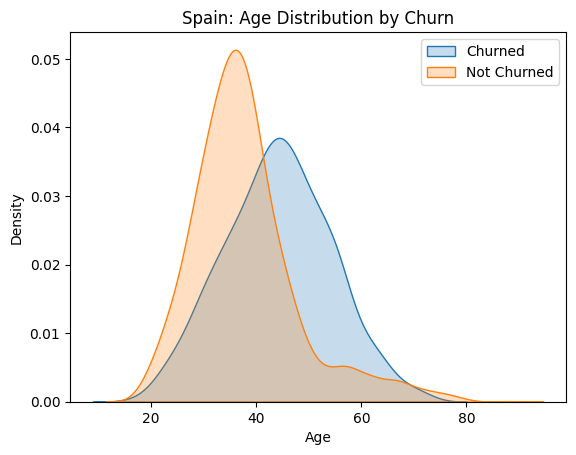

In [ ]:
sns.kdeplot(data=df_spain[df_spain['Exited'] == 1]['Age'], label='Churned', fill=True)
sns.kdeplot(data=df_spain[df_spain['Exited'] == 0]['Age'], label='Not Churned', fill=True)
plt.title("Spain: Age Distribution by Churn")
plt.legend()
plt.show()

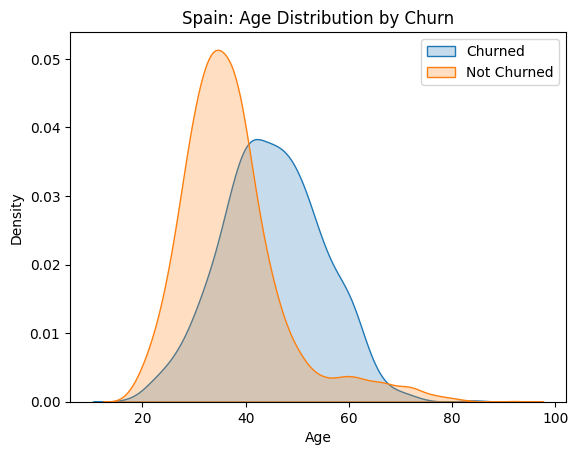

In [ ]:
sns.kdeplot(data=df_france[df_france['Exited'] == 1]['Age'], label='Churned', fill=True)
sns.kdeplot(df_france[df_france['Exited'] == 0]['Age'], label='Not Churned', fill=True)
plt.title("Spain: Age Distribution by Churn")
plt.legend()
plt.show()

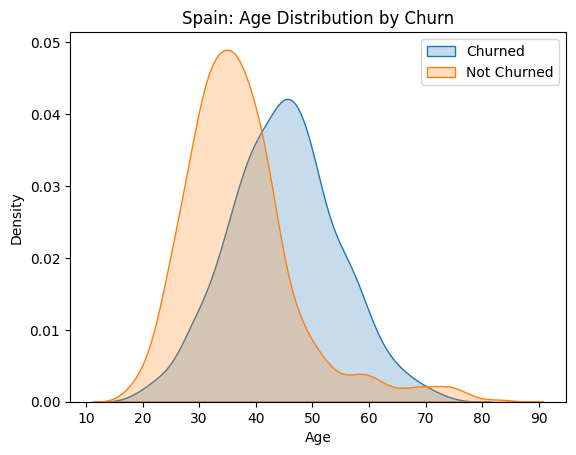

In [ ]:
sns.kdeplot(data=df_germany[df_germany['Exited'] == 1]['Age'], label='Churned', fill=True)
sns.kdeplot(data=df_germany[df_germany['Exited'] == 0]['Age'], label='Not Churned', fill=True)
plt.title("Spain: Age Distribution by Churn")
plt.legend()
plt.show()

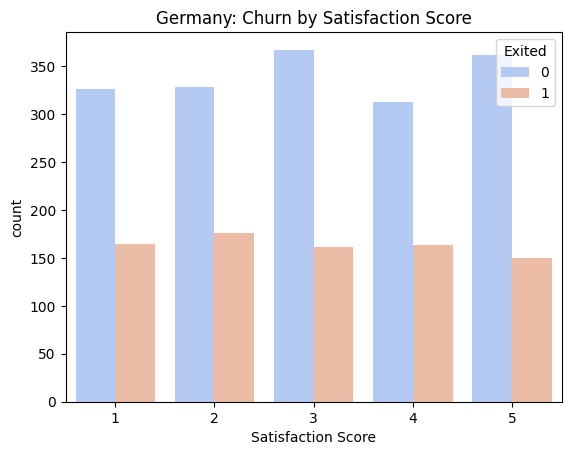

In [ ]:
sns.countplot(data=df_germany, x='Satisfaction Score', hue='Exited', palette='coolwarm')
plt.title("Germany: Churn by Satisfaction Score")
plt.show()

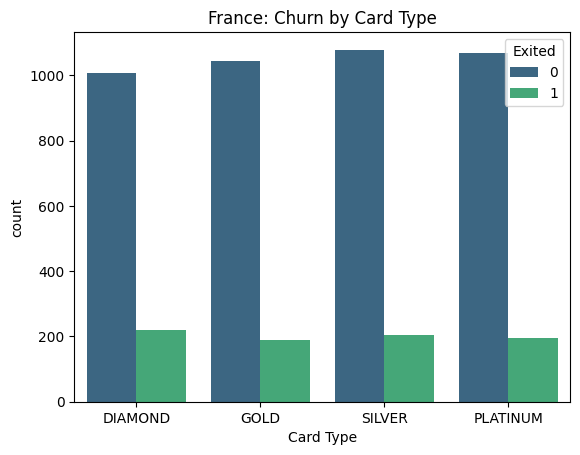

In [ ]:
sns.countplot(data=df_france, x='Card Type', hue='Exited', palette='viridis')
plt.title("France: Churn by Card Type")
plt.show()

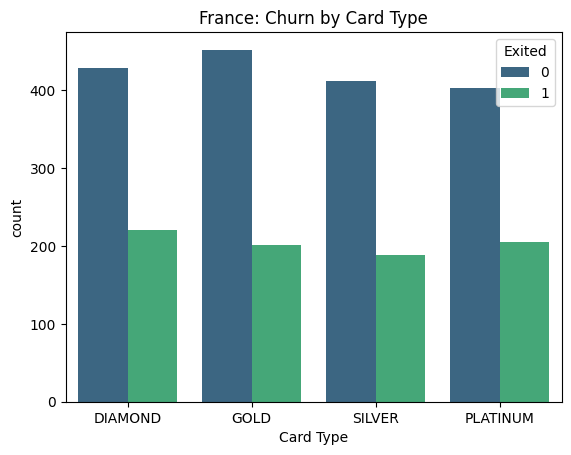

In [ ]:
sns.countplot(data=df_germany, x='Card Type', hue='Exited', palette='viridis')
plt.title("France: Churn by Card Type")
plt.show()

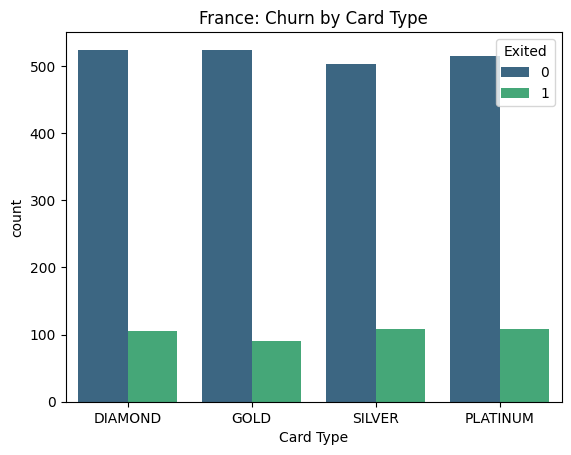

In [ ]:
sns.countplot(data=df_spain, x='Card Type', hue='Exited', palette='viridis')
plt.title("France: Churn by Card Type")
plt.show()

In [ ]:
summary = df.groupby('Geography').agg({
    'Exited': 'mean',
    'Satisfaction Score': 'mean',
    'Complain': 'mean',
    'Balance': 'mean'
}).round(2)

summary['Exited'] = summary['Exited'] * 100  # convert to %
summary.rename(columns={'Exited': 'Churn Rate (%)'}, inplace=True)

print(summary)


           Churn Rate (%)  Satisfaction Score  Complain    Balance
Geography                                                         
France               16.0                3.02      0.16   62092.64
Germany              32.0                3.01      0.33  119730.12
Spain                17.0                3.01      0.17   61818.15


In [ ]:
df_france.to_csv('france_df.csv')
df_germany.to_csv('germany_df.csv')
df_spain.to_csv('spain_df.csv')

In [ ]:
df.to_csv('cleaned_BankChurn.csv')